In [1]:
from nltk.tokenize import word_tokenize
from tqdm import tqdm
import re
import pickle
import csv
import pandas as pd
from pandas import DataFrame 
import numpy as np
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import config
import sys
import jsonpickle
import nltk
nltk.download('punkt')
nltk.download('stopwords')
 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mit16\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mit16\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
twt_alevie = pd.read_csv('..//db//twt_alevie.csv')
twt_alevie

,dates,ID,content,rt,like
0,2024년 2월 27일,Aaron Levie@levie,"For context, Netflix could ship you their enti...",69,434
1,2024년 2월 26일,Aaron Levie@levie,Startups tend to win in spaces where the incum...,165,894
2,2024년 2월 25일,Aaron Levie@levie,People’s understanding of business is funny. B...,30,251
3,2024년 2월 25일,Aaron Levie@levie,How could you passionately hate people this much.,71,607
4,2024년 2월 24일,Aaron Levie@levie,We’re beta testing an AI feature internally at...,39,232
...,...,...,...,...,...
252,2022년 3월 16일,Aaron Levie@levie,Welcome to the new economy,8,108
253,2022년 3월 13일,Aaron Levie@levie,I’m a single issue voter: time should not just...,76,1.2천
254,2022년 3월 11일,Aaron Levie@levie,There are few joys in life like playing with f...,19,250
255,2022년 3월 10일,Aaron Levie@levie,https://finance.yahoo.com/news/mast-j-germe...,1,36


In [3]:
twt_list = twt_alevie['content'].values 

In [4]:
twt_list = twt_list.tolist()
twt_list

['For context, Netflix could ship you their entire film catalog on a single disc.',
 'Startups tend to win in spaces where the incumbent cannot respond effectively due to organizational, business model, or brand reasons. Perhaps the fact that AI has a long tail of brand risks and organizational dilemmas in resolving them, we’ll see more startup-led disruption.',
 'People’s understanding of business is funny. Being *unprofitable* is a far faster way to have a site run into the ground.',
 'How could you passionately hate people this much.',
 'We’re beta testing an AI feature internally at Box that was a concept we brainstormed about 5 years ago that would have been literally impossible to pull off back then. Pretty remarkable to see what’s now possible to solve with AI.',
 'The main job of a founder is taking an offhand comment made in a meeting for 7 seconds and pivoting the whole business model around it.',
 'This demo is insane. Try it: http://retellai.com',
 'Given the incentives the

In [5]:
twt_list = list(map(str,twt_list)) # 리스트 원소들 문자열로 변환
twt_list

['For context, Netflix could ship you their entire film catalog on a single disc.',
 'Startups tend to win in spaces where the incumbent cannot respond effectively due to organizational, business model, or brand reasons. Perhaps the fact that AI has a long tail of brand risks and organizational dilemmas in resolving them, we’ll see more startup-led disruption.',
 'People’s understanding of business is funny. Being *unprofitable* is a far faster way to have a site run into the ground.',
 'How could you passionately hate people this much.',
 'We’re beta testing an AI feature internally at Box that was a concept we brainstormed about 5 years ago that would have been literally impossible to pull off back then. Pretty remarkable to see what’s now possible to solve with AI.',
 'The main job of a founder is taking an offhand comment made in a meeting for 7 seconds and pivoting the whole business model around it.',
 'This demo is insane. Try it: http://retellai.com',
 'Given the incentives the

In [6]:
tk_list = []
for sentence in twt_list:
    tk_list.append(word_tokenize(sentence))
 
tk_list # 트윗 별 토큰화된 단어

[['For',
  'context',
  ',',
  'Netflix',
  'could',
  'ship',
  'you',
  'their',
  'entire',
  'film',
  'catalog',
  'on',
  'a',
  'single',
  'disc',
  '.'],
 ['Startups',
  'tend',
  'to',
  'win',
  'in',
  'spaces',
  'where',
  'the',
  'incumbent',
  'can',
  'not',
  'respond',
  'effectively',
  'due',
  'to',
  'organizational',
  ',',
  'business',
  'model',
  ',',
  'or',
  'brand',
  'reasons',
  '.',
  'Perhaps',
  'the',
  'fact',
  'that',
  'AI',
  'has',
  'a',
  'long',
  'tail',
  'of',
  'brand',
  'risks',
  'and',
  'organizational',
  'dilemmas',
  'in',
  'resolving',
  'them',
  ',',
  'we',
  '’',
  'll',
  'see',
  'more',
  'startup-led',
  'disruption',
  '.'],
 ['People',
  '’',
  's',
  'understanding',
  'of',
  'business',
  'is',
  'funny',
  '.',
  'Being',
  '*',
  'unprofitable',
  '*',
  'is',
  'a',
  'far',
  'faster',
  'way',
  'to',
  'have',
  'a',
  'site',
  'run',
  'into',
  'the',
  'ground',
  '.'],
 ['How',
  'could',
  'you',
  '

In [7]:
import string
from nltk.corpus import stopwords
stop_words = set(stopwords.words())
result_list = []

for tk_list_list in tk_list: # [[]] to []
    result = [] 
    for word in tk_list_list: # list to word arg
        
        if (word not in stop_words) and (word not in string.punctuation) and (word not in ('’')) and (word not in ('“')) and (word not in ('”')):   
            word = word.lower()
            result.append(word)
    result_list.append(result)
print(result_list) # 불용어(스탑워드) 제거

[['for', 'context', 'netflix', 'ship', 'entire', 'film', 'catalog', 'single', 'disc'], ['startups', 'tend', 'win', 'spaces', 'incumbent', 'respond', 'effectively', 'due', 'organizational', 'business', 'model', 'brand', 'reasons', 'perhaps', 'fact', 'ai', 'long', 'tail', 'brand', 'risks', 'organizational', 'dilemmas', 'resolving', 'startup-led', 'disruption'], ['people', 'understanding', 'business', 'funny', 'being', 'unprofitable', 'faster', 'site', 'run', 'ground'], ['how', 'passionately', 'hate'], ['we', 'beta', 'testing', 'ai', 'feature', 'internally', 'box', 'concept', 'brainstormed', '5', 'years', 'ago', 'literally', 'impossible', 'pull', 'back', 'pretty', 'remarkable', 'possible', 'solve', 'ai'], ['the', 'job', 'founder', 'taking', 'offhand', 'comment', 'made', 'meeting', '7', 'seconds', 'pivoting', 'business', 'model'], ['this', 'demo', 'insane', 'try', 'http', '//retellai.com'], ['given', 'incentives', 'public', 'cloud', 'providers', 'bring', 'workloads', 'possible', 'inevitabl

In [8]:
from nltk.corpus import wordnet
from collections import defaultdict

def assign_category(word):
    try:
        categories = ['business', 'company', 'emotion', 'social', 'technology', 'general', 'product', 'politics', 'environment', 'innovation']
        max_similarity = -1  # 초기값 설정
        assigned_category = None
        
        for category in categories:
            synsets = wordnet.synsets(category)
            for synset in synsets:
                similarity = synset.path_similarity(wordnet.synsets(word)[0]) if wordnet.synsets(word) else ''
                if similarity and similarity > max_similarity:
                    max_similarity = similarity
                    assigned_category = category
        return assigned_category
    except IndexError:
        return None

def assign_categories_to_sentence(sentence_tokens):
    category_counts = defaultdict(int)
    
    for word in sentence_tokens:
        category = assign_category(word)
        if category:
            category_counts[category] += 1
    
    if category_counts:
        # 가장 많이 할당된 카테고리 반환
        assigned_category = max(category_counts, key=category_counts.get)
        return assigned_category, category_counts[assigned_category]
    else:
        return None

# 테스트
sentence_tokens = ['for', 'context', 'netflix', 'ship', 'entire', 'film', 'catalog', 'single', 'disc']
assigned_category = assign_categories_to_sentence(sentence_tokens)
print(f"입력된 문장의 토큰 '{sentence_tokens}'에 대한 연관성이 가장 높은 카테고리: {assigned_category}")


입력된 문장의 토큰 '['for', 'context', 'netflix', 'ship', 'entire', 'film', 'catalog', 'single', 'disc']'에 대한 연관성이 가장 높은 카테고리: ('product', 4)


In [9]:
# 토큰화된 단어와 주제 연결
topic_conv_list=[]
for sentence in result_list:
    assigned_category = assign_categories_to_sentence(sentence)
    if assigned_category != None:
        topic_conv_list.append({'word' : sentence, 'topic' : assigned_category[0]})
topic_conv_list

[{'word': ['for',
   'context',
   'netflix',
   'ship',
   'entire',
   'film',
   'catalog',
   'single',
   'disc'],
  'topic': 'product'},
 {'word': ['startups',
   'tend',
   'win',
   'spaces',
   'incumbent',
   'respond',
   'effectively',
   'due',
   'organizational',
   'business',
   'model',
   'brand',
   'reasons',
   'perhaps',
   'fact',
   'ai',
   'long',
   'tail',
   'brand',
   'risks',
   'organizational',
   'dilemmas',
   'resolving',
   'startup-led',
   'disruption'],
  'topic': 'social'},
 {'word': ['people',
   'understanding',
   'business',
   'funny',
   'being',
   'unprofitable',
   'faster',
   'site',
   'run',
   'ground'],
  'topic': 'business'},
 {'word': ['how', 'passionately', 'hate'], 'topic': 'social'},
 {'word': ['we',
   'beta',
   'testing',
   'ai',
   'feature',
   'internally',
   'box',
   'concept',
   'brainstormed',
   '5',
   'years',
   'ago',
   'literally',
   'impossible',
   'pull',
   'back',
   'pretty',
   'remarkable',
   '

In [10]:
# 트윗의 카테고리 카운트
topic_conv_list = pd.DataFrame(topic_conv_list)
df = topic_conv_list['topic'].value_counts()
df

topic
business       100
social          88
product         23
company         20
emotion          8
environment      5
politics         4
general          3
innovation       1
technology       1
Name: count, dtype: int64

In [11]:
df.values.tolist()

[100, 88, 23, 20, 8, 5, 4, 3, 1, 1]

In [12]:
df.index.tolist()

['business',
 'social',
 'product',
 'company',
 'emotion',
 'environment',
 'politics',
 'general',
 'innovation',
 'technology']

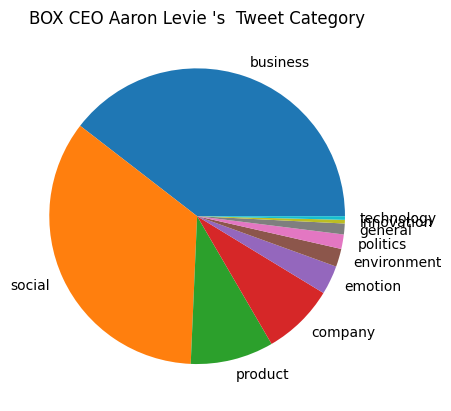

In [13]:
import matplotlib.pyplot as plt

plt.pie(df.values.tolist(),labels=df.index.tolist() )
plt.title("BOX CEO Aaron Levie 's  Tweet Category")
plt.show()

감성분석

In [14]:
from nltk import sent_tokenize, word_tokenize
import nltk
nltk.download('all')
from nltk.corpus import stopwords
from nltk.stem.porter import *
from wordcloud import WordCloud, STOPWORDS

from textblob import TextBlob
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import config
import sys
import jsonpickle
import os
plt.style.use('fivethirtyeight')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\mit16\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\mit16\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\mit16\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\mit16\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\mit16\AppData\Roaming\nltk_data...
[nltk_data]    | 

In [15]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

senti_analyzer = SentimentIntensityAnalyzer()

In [16]:
from textblob import TextBlob


twt_df_copy = twt_alevie.copy()
twt_df_copy['content'] = twt_df_copy['content'].astype(str)

# Create a function to get subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Create two new columns
twt_df_copy['Subjectivity'] = twt_df_copy['content'].apply(getSubjectivity)
twt_df_copy['Polarity'] = twt_df_copy['content'].apply(getPolarity)

# Compute negative, neutral and positive analysis
def getAnalysis(score):
    if score < 0:
        return 0 # NEGATIVE
    elif score == 0:
        return 1 # NEUTRAL
    else:
        return 2 # POSITIVE
    
twt_df_copy['Analysis'] = twt_df_copy['Polarity'].apply(getAnalysis)

twt_df_copy.head()

,dates,ID,content,rt,like,Subjectivity,Polarity,Analysis
0,2024년 2월 27일,Aaron Levie@levie,"For context, Netflix could ship you their enti...",69,434,0.419643,-0.035714,0
1,2024년 2월 26일,Aaron Levie@levie,Startups tend to win in spaces where the incum...,165,894,0.418750,0.281250,2
2,2024년 2월 25일,Aaron Levie@levie,People’s understanding of business is funny. B...,30,251,1.000000,0.175000,2
3,2024년 2월 25일,Aaron Levie@levie,How could you passionately hate people this much.,71,607,0.550000,-0.300000,0
4,2024년 2월 24일,Aaron Levie@levie,We’re beta testing an AI feature internally at...,39,232,0.625000,0.055556,2


In [17]:
twt_df_copy['Analysis'].value_counts()

Analysis
2    138
1     73
0     46
Name: count, dtype: int64

In [18]:
twt_df_copy['Analysis'].value_counts().values.tolist()

[138, 73, 46]

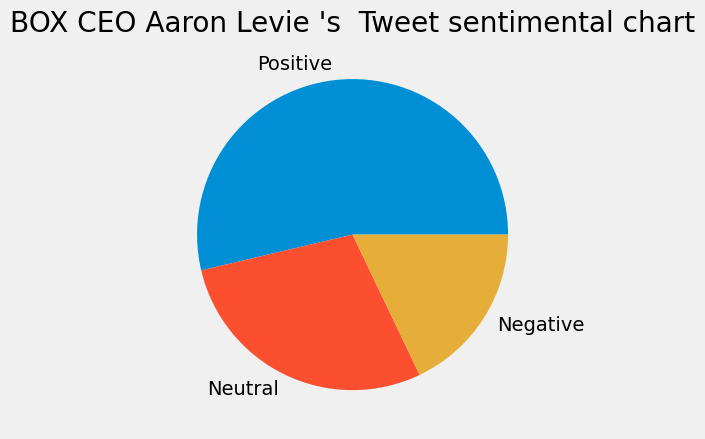

In [19]:
plt.pie(twt_df_copy['Analysis'].value_counts().values.tolist(), labels=['Positive', 'Neutral', 'Negative'])
plt.title("BOX CEO Aaron Levie 's  Tweet sentimental chart")
plt.show()

딥러닝 BERT

In [20]:
# 입력요소
# 트윗의 주제, subjectivity(주관성점수; 의견이 주관적인 생각인지 객관적인 내용인지), 감성지수, 리트윗수, 좋아요수

# 출력할 예측요소
# 양수
# 음수
# 전날 음수값 대비 절대값 작은경우 ( 감소폭이 줄어들었을때)
# 전날 음수값 대비 절대값 큰 경우
# 전날 양수값 대비 작은경우
# 전날 양수값 대비 큰 경우

# lstm



In [21]:
twt_alevie = pd.read_csv('..//db//new_set//twt_alevie.csv')
twt_alevie

,dates,ID,content,rt,like
0,2022-03-19,Aaron Levie@levie,This needs to be turned into a buddy comedy ASAP.,18,416
1,2022-03-21,Aaron Levie@levie,The cool thing about naming a company Box is a...,2,131
2,2022-03-24,Aaron Levie@levie,Amazing quote:,9,196
3,2022-03-25,Aaron Levie@levie,"Some say innovation is dead, but how can that ...",59,580
4,2022-03-29,Aaron Levie@levie,The challenge with taxing unrealized gains is ...,96,1.1K
...,...,...,...,...,...
227,2024-02-23,Aaron Levie@levie,We’re beta testing an AI feature internally at...,38,229
228,2024-02-24,Aaron Levie@levie,How could you passionately hate people this much.,71,607
229,2024-02-24,Aaron Levie@levie,People’s understanding of business is funny. B...,30,251
230,2024-02-25,Aaron Levie@levie,Startups tend to win in spaces where the incum...,164,897


In [22]:
twt_abch = pd.read_csv('..//db//new_set//twt_abch.csv')
twt_bill = pd.read_csv('..//db//new_set//twt_bill.csv')
twt_carl = pd.read_csv('..//db//new_set//twt_carl.csv')
twt_elon1 = pd.read_csv('..//db//new_set//twt_elon1.csv')
twt_elon2 = pd.read_csv('..//db//new_set//twt_elon2.csv')
twt_elon3 = pd.read_csv('..//db//new_set//twt_elon3.csv')
twt_elon4 = pd.read_csv('..//db//new_set//twt_elon4.csv')
twt_elon5 = pd.read_csv('..//db//new_set//twt_elon5.csv')
twt_elon6 = pd.read_csv('..//db//new_set//twt_elon6.csv')
twt_elon7 = pd.read_csv('..//db//new_set//twt_elon7.csv')
twt_elon8 = pd.read_csv('..//db//new_set//twt_elon8.csv')
twt_john1 = pd.read_csv('..//db//new_set//twt_john1.csv')
twt_john2 = pd.read_csv('..//db//new_set//twt_john2.csv')
twt_john3 = pd.read_csv('..//db//new_set//twt_john3.csv')
twt_lisasu = pd.read_csv('..//db//new_set//twt_lisasu.csv')
twt_reed = pd.read_csv('..//db//new_set//twt_reed.csv')
twt_richard = pd.read_csv('..//db//new_set//twt_richard.csv')
twt_tim1 = pd.read_csv('..//db//new_set//twt_tim1.csv')
twt_tim2 = pd.read_csv('..//db//new_set//twt_tim2.csv')


In [23]:
twt_merge = pd.concat([twt_alevie, twt_abch, twt_bill, twt_carl, twt_elon1, twt_elon2, twt_elon3, twt_elon4, twt_elon5, twt_elon6, twt_elon7, twt_elon8, twt_john1, twt_john2, twt_john3, twt_lisasu, twt_reed, twt_richard, twt_tim1, twt_tim2])
twt_merge

,dates,ID,content,rt,like
0,2022-03-19,Aaron Levie@levie,This needs to be turned into a buddy comedy ASAP.,18,416
1,2022-03-21,Aaron Levie@levie,The cool thing about naming a company Box is a...,2,131
2,2022-03-24,Aaron Levie@levie,Amazing quote:,9,196
3,2022-03-25,Aaron Levie@levie,"Some say innovation is dead, but how can that ...",59,580
4,2022-03-29,Aaron Levie@levie,The challenge with taxing unrealized gains is ...,96,1.1K
...,...,...,...,...,...
51,2023-01-12,Tim Cook@tim_cook,We can’t wait to bring MLS Season Pass to fans...,487,4.6K
52,2023-01-16,Tim Cook@tim_cook,"Dr. King said, ""We must come to see that human...",661,4.8K
53,2023-01-17,Tim Cook@tim_cook,The best just got better! Meet MacBook Pro and...,1.5K,11K
54,2023-01-18,Tim Cook@tim_cook,"The next generation of HomePod delivers rich, ...",1.6K,12K


In [24]:
twt_merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2128 entries, 0 to 55
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   dates    2128 non-null   object
 1   ID       2128 non-null   object
 2   content  2111 non-null   object
 3   rt       2106 non-null   object
 4   like     2128 non-null   object
dtypes: object(5)
memory usage: 99.8+ KB


In [25]:
twt_merge['dates'] = pd.to_datetime(twt_merge['dates'])

In [26]:
twt_merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2128 entries, 0 to 55
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dates    2128 non-null   datetime64[ns]
 1   ID       2128 non-null   object        
 2   content  2111 non-null   object        
 3   rt       2106 non-null   object        
 4   like     2128 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 99.8+ KB


In [27]:
twt_merge

,dates,ID,content,rt,like
0,2022-03-19,Aaron Levie@levie,This needs to be turned into a buddy comedy ASAP.,18,416
1,2022-03-21,Aaron Levie@levie,The cool thing about naming a company Box is a...,2,131
2,2022-03-24,Aaron Levie@levie,Amazing quote:,9,196
3,2022-03-25,Aaron Levie@levie,"Some say innovation is dead, but how can that ...",59,580
4,2022-03-29,Aaron Levie@levie,The challenge with taxing unrealized gains is ...,96,1.1K
...,...,...,...,...,...
51,2023-01-12,Tim Cook@tim_cook,We can’t wait to bring MLS Season Pass to fans...,487,4.6K
52,2023-01-16,Tim Cook@tim_cook,"Dr. King said, ""We must come to see that human...",661,4.8K
53,2023-01-17,Tim Cook@tim_cook,The best just got better! Meet MacBook Pro and...,1.5K,11K
54,2023-01-18,Tim Cook@tim_cook,"The next generation of HomePod delivers rich, ...",1.6K,12K


In [28]:
twt_merge['content'][twt_merge['content'].isnull()]

46     NaN
98     NaN
102    NaN
103    NaN
87     NaN
121    NaN
22     NaN
34     NaN
42     NaN
27     NaN
38     NaN
77     NaN
36     NaN
62     NaN
41     NaN
23     NaN
45     NaN
Name: content, dtype: object

In [29]:
stock = pd.read_csv('..//crawling//stock_merge_df.csv')
stock

,Date,name,Open,High,Low,Close,AdjClose,Volume,adjClose_diff
0,2019-03-11,@reedhastings,352.000000,358.980011,350.029999,358.859985,358.859985,5387300,NaN
1,2019-03-12,@reedhastings,359.369995,360.130005,353.799988,356.269989,356.269989,5164600,-2.589996
2,2019-03-13,@reedhastings,355.809998,362.480011,352.769989,361.209991,361.209991,6444100,4.940002
3,2019-03-14,@reedhastings,360.500000,363.839996,358.100006,358.820007,358.820007,5271400,-2.389984
4,2019-03-15,@reedhastings,361.019989,364.000000,358.890015,361.459991,361.459991,8444500,2.639984
...,...,...,...,...,...,...,...,...,...
12140,2024-03-04,@bchesky,159.899994,163.014999,157.929993,158.089996,158.089996,4403200,-1.630005
12141,2024-03-05,@bchesky,157.199997,159.979996,156.139999,159.330002,159.330002,4714300,1.240006
12142,2024-03-06,@bchesky,160.100006,164.589996,160.070007,163.869995,163.869995,5167900,4.539993
12143,2024-03-07,@bchesky,165.000000,165.384995,162.240005,163.539993,163.539993,3810300,-0.330002


In [30]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12145 entries, 0 to 12144
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           12145 non-null  object 
 1   name           12145 non-null  object 
 2   Open           12145 non-null  float64
 3   High           12145 non-null  float64
 4   Low            12145 non-null  float64
 5   Close          12145 non-null  float64
 6   AdjClose       12145 non-null  float64
 7   Volume         12145 non-null  int64  
 8   adjClose_diff  12135 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 854.1+ KB


In [31]:
stock['Date'] = pd.to_datetime(stock['Date'])
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12145 entries, 0 to 12144
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           12145 non-null  datetime64[ns]
 1   name           12145 non-null  object        
 2   Open           12145 non-null  float64       
 3   High           12145 non-null  float64       
 4   Low            12145 non-null  float64       
 5   Close          12145 non-null  float64       
 6   AdjClose       12145 non-null  float64       
 7   Volume         12145 non-null  int64         
 8   adjClose_diff  12135 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 854.1+ KB


In [32]:
twt_merge = twt_merge.rename(columns={'dates': 'Date', 'ID': 'name'})
twt_merge

,Date,name,content,rt,like
0,2022-03-19,Aaron Levie@levie,This needs to be turned into a buddy comedy ASAP.,18,416
1,2022-03-21,Aaron Levie@levie,The cool thing about naming a company Box is a...,2,131
2,2022-03-24,Aaron Levie@levie,Amazing quote:,9,196
3,2022-03-25,Aaron Levie@levie,"Some say innovation is dead, but how can that ...",59,580
4,2022-03-29,Aaron Levie@levie,The challenge with taxing unrealized gains is ...,96,1.1K
...,...,...,...,...,...
51,2023-01-12,Tim Cook@tim_cook,We can’t wait to bring MLS Season Pass to fans...,487,4.6K
52,2023-01-16,Tim Cook@tim_cook,"Dr. King said, ""We must come to see that human...",661,4.8K
53,2023-01-17,Tim Cook@tim_cook,The best just got better! Meet MacBook Pro and...,1.5K,11K
54,2023-01-18,Tim Cook@tim_cook,"The next generation of HomePod delivers rich, ...",1.6K,12K


In [33]:
twt_merge['name'] = twt_merge['name'].str.split('@').str[1].apply(lambda x: '@' + x) # 골뱅이 기준 오른쪽 글자만 남기고 앞에 골뱅이 붙여주기
twt_merge
 

,Date,name,content,rt,like
0,2022-03-19,@levie,This needs to be turned into a buddy comedy ASAP.,18,416
1,2022-03-21,@levie,The cool thing about naming a company Box is a...,2,131
2,2022-03-24,@levie,Amazing quote:,9,196
3,2022-03-25,@levie,"Some say innovation is dead, but how can that ...",59,580
4,2022-03-29,@levie,The challenge with taxing unrealized gains is ...,96,1.1K
...,...,...,...,...,...
51,2023-01-12,@tim_cook,We can’t wait to bring MLS Season Pass to fans...,487,4.6K
52,2023-01-16,@tim_cook,"Dr. King said, ""We must come to see that human...",661,4.8K
53,2023-01-17,@tim_cook,The best just got better! Meet MacBook Pro and...,1.5K,11K
54,2023-01-18,@tim_cook,"The next generation of HomePod delivers rich, ...",1.6K,12K


In [34]:
df = pd.merge(stock, twt_merge, on=['Date', 'name'], how='outer')
df

,Date,name,Open,High,Low,Close,AdjClose,Volume,adjClose_diff,content,rt,like
0,2019-03-11,@reedhastings,352.000000,358.980011,350.029999,358.859985,358.859985,5387300.0,NaN,NaN,NaN,NaN
1,2019-03-12,@reedhastings,359.369995,360.130005,353.799988,356.269989,356.269989,5164600.0,-2.589996,NaN,NaN,NaN
2,2019-03-13,@reedhastings,355.809998,362.480011,352.769989,361.209991,361.209991,6444100.0,4.940002,NaN,NaN,NaN
3,2019-03-14,@reedhastings,360.500000,363.839996,358.100006,358.820007,358.820007,5271400.0,-2.389984,NaN,NaN,NaN
4,2019-03-15,@reedhastings,361.019989,364.000000,358.890015,361.459991,361.459991,8444500.0,2.639984,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
13623,2023-01-12,@tim_cook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,We can’t wait to bring MLS Season Pass to fans...,487,4.6K
13624,2023-01-16,@tim_cook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Dr. King said, ""We must come to see that human...",661,4.8K
13625,2023-01-17,@tim_cook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The best just got better! Meet MacBook Pro and...,1.5K,11K
13626,2023-01-18,@tim_cook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"The next generation of HomePod delivers rich, ...",1.6K,12K


In [35]:
df.to_csv('final_df.csv', index=False)

In [36]:
newdf = pd.read_csv('stock_final.csv')
newdf
newdf.drop(columns='Unnamed: 0')

,Date,name,Open,High,Low,Close,AdjClose,Volume,adjClose_diff,content,rt,like
0,2022-03-10,@BillGates,283.019989,286.600006,280.579987,285.589996,280.513275,30628000.0,-2.858246,no content,0,0
1,2022-03-10,@Carl_C_Icahn,54.110001,54.400002,53.500000,54.000000,36.296310,551600.0,0.047050,no content,0,0
2,2022-03-10,@JohnLegere,120.660004,123.919998,120.440002,123.540001,122.514946,4200600.0,1.566887,Absolutely not - always ice cold water!,2.0,64
3,2022-03-10,@JohnLegere,120.660004,123.919998,120.440002,123.540001,122.514946,4200600.0,1.566887,Spell check via text is a game changer!,1.0,21
4,2022-03-10,@JohnLegere,120.660004,123.919998,120.440002,123.540001,122.514946,4200600.0,1.566887,I wish I saw this before my flight today!\r\nh...,2.0,23
...,...,...,...,...,...,...,...,...,...,...,...,...
6441,2024-03-04,@tim_cock,176.149994,176.899994,173.789993,175.100006,175.100006,81510100.0,-4.559998,no content,0,0
6442,2024-03-05,@tim_cock,170.759995,172.039993,169.619995,170.119995,170.119995,95132400.0,-4.980011,no content,0,0
6443,2024-03-06,@tim_cock,171.059998,171.240005,168.679993,169.119995,169.119995,68587700.0,-1.000000,no content,0,0
6444,2024-03-07,@tim_cock,169.149994,170.729996,168.490005,169.000000,169.000000,71765100.0,-0.119995,no content,0,0


In [37]:
twt_list = newdf['content'][newdf['content'] != 'no content'].values 
twt_list = twt_list.tolist()
twt_list

['Absolutely not - always ice cold water!',
 'Spell check via text is a game changer!',
 'I wish I saw this before my flight today!\r\nhttps://buzzfeed.com/daniellehealy/products-youll-never-want-to-fly-without?origin=web-hf…',
 'ABSOLUTELY NOT!',
 'Baseball is coming back!\r\nhttps://espn.com/mlb/story/_/id/33399466/mlb-mlbpa-reach-labor-agreement-everything-need-know-lockout-ends…',
 "I love this idea - let's give employees more of a work/life balance!",
 'Another resource to help Ukraine!',
 'One of the first times an NFT lab is really looking like a "real company"...\r\nhttps://theverge.com/2022/3/11/22973394/bored-ape-yacht-club-cryptopunks-meebits-nft…',
 'Hi HELIOS!',
 'What are your thoughts about probable inflation rate over next few years?',
 'There is a beauty to the biological substrate',
 'By the pricking of my thumbs …',
 'I hereby challenge\r\nВладимир Путин \r\nto single combat\r\n\r\nStakes are Україна',
 'Congratulations SpaceX team for all that you have accomplished!

In [38]:
twt_list = list(map(str,twt_list))

In [39]:
twt_list[784]

"can't get enough"

In [40]:
# df['content'].isnull().value_counts() # content null개수 11517개


In [41]:
tk_list = []
for sentence in twt_list:
    tk_list.append(word_tokenize(sentence))
 
tk_list # 트윗 별 토큰화된 단어

[['Absolutely', 'not', '-', 'always', 'ice', 'cold', 'water', '!'],
 ['Spell', 'check', 'via', 'text', 'is', 'a', 'game', 'changer', '!'],
 ['I',
  'wish',
  'I',
  'saw',
  'this',
  'before',
  'my',
  'flight',
  'today',
  '!',
  'https',
  ':',
  '//buzzfeed.com/daniellehealy/products-youll-never-want-to-fly-without',
  '?',
  'origin=web-hf…'],
 ['ABSOLUTELY', 'NOT', '!'],
 ['Baseball',
  'is',
  'coming',
  'back',
  '!',
  'https',
  ':',
  '//espn.com/mlb/story/_/id/33399466/mlb-mlbpa-reach-labor-agreement-everything-need-know-lockout-ends…'],
 ['I',
  'love',
  'this',
  'idea',
  '-',
  'let',
  "'s",
  'give',
  'employees',
  'more',
  'of',
  'a',
  'work/life',
  'balance',
  '!'],
 ['Another', 'resource', 'to', 'help', 'Ukraine', '!'],
 ['One',
  'of',
  'the',
  'first',
  'times',
  'an',
  'NFT',
  'lab',
  'is',
  'really',
  'looking',
  'like',
  'a',
  '``',
  'real',
  'company',
  "''",
  '...',
  'https',
  ':',
  '//theverge.com/2022/3/11/22973394/bored-ape-y

In [42]:
len(tk_list)

2111

In [43]:
import string
from nltk.corpus import stopwords
stop_words = set(stopwords.words())
result_list = []

for tk_list_list in tk_list: # [[]] to []
    result = [] 
    for word in tk_list_list: # list to word arg
        
        if (word not in stop_words) and (word not in string.punctuation) and (word not in ('’')) and (word not in ('“')) and (word not in ('”')):   
            word = word.lower()
            result.append(word)
    result_list.append(result)
print(result_list) # 불용어(스탑워드) 제거

[['absolutely', 'ice', 'cold', 'water'], ['spell', 'check', 'text', 'game', 'changer'], ['i', 'wish', 'i', 'flight', 'today', 'https', '//buzzfeed.com/daniellehealy/products-youll-never-want-to-fly-without', 'origin=web-hf…'], ['absolutely', 'not'], ['baseball', 'coming', 'back', 'https', '//espn.com/mlb/story/_/id/33399466/mlb-mlbpa-reach-labor-agreement-everything-need-know-lockout-ends…'], ['i', 'love', 'idea', "'s", 'give', 'employees', 'work/life', 'balance'], ['another', 'resource', 'ukraine'], ['one', 'times', 'nft', 'lab', '``', 'real', 'company', "''", '...', 'https', '//theverge.com/2022/3/11/22973394/bored-ape-yacht-club-cryptopunks-meebits-nft…'], ['hi', 'helios'], ['what', 'thoughts', 'probable', 'inflation', 'rate', 'years'], ['there', 'beauty', 'biological', 'substrate'], ['by', 'pricking', 'thumbs', '…'], ['i', 'challenge', 'владимир', 'путин', 'single', 'combat', 'stakes', 'україна'], ['congratulations', 'spacex', 'team', 'accomplished'], ['telegram', 'post', 'ramzan',

In [44]:
len(result_list)

2111

In [45]:
pd.DataFrame(result_list).to_csv('result_list_test.csv', index_label=False)

In [46]:
# 토큰화된 단어와 주제 연결
topic_conv_list=[]
for sentence in result_list:
    assigned_category = assign_categories_to_sentence(sentence)
    if assigned_category != None:
        topic_conv_list.append({'word' : sentence, 'topic' : assigned_category[0]})
    else:
        topic_conv_list.append({'word' : 'null', 'topic' : 'null'}) # 토픽 안뽑히는 행은 null값으로 집어넣기
topic_conv_list

[{'word': ['absolutely', 'ice', 'cold', 'water'], 'topic': 'social'},
 {'word': ['spell', 'check', 'text', 'game', 'changer'], 'topic': 'business'},
 {'word': ['i',
   'wish',
   'i',
   'flight',
   'today',
   'https',
   '//buzzfeed.com/daniellehealy/products-youll-never-want-to-fly-without',
   'origin=web-hf…'],
  'topic': 'business'},
 {'word': ['absolutely', 'not'], 'topic': 'social'},
 {'word': ['baseball',
   'coming',
   'back',
   'https',
   '//espn.com/mlb/story/_/id/33399466/mlb-mlbpa-reach-labor-agreement-everything-need-know-lockout-ends…'],
  'topic': 'business'},
 {'word': ['i',
   'love',
   'idea',
   "'s",
   'give',
   'employees',
   'work/life',
   'balance'],
  'topic': 'emotion'},
 {'word': ['another', 'resource', 'ukraine'], 'topic': 'social'},
 {'word': ['one',
   'times',
   'nft',
   'lab',
   '``',
   'real',
   'company',
   "''",
   '...',
   'https',
   '//theverge.com/2022/3/11/22973394/bored-ape-yacht-club-cryptopunks-meebits-nft…'],
  'topic': 'busi

In [47]:
len(topic_conv_list)

2111

In [48]:
pd.DataFrame(topic_conv_list).to_csv('topic_conv_list_test.csv', index_label=False)

In [49]:
topic_df = pd.DataFrame(topic_conv_list)
topic_df

,word,topic
0,"[absolutely, ice, cold, water]",social
1,"[spell, check, text, game, changer]",business
2,"[i, wish, i, flight, today, https, //buzzfeed....",business
3,"[absolutely, not]",social
4,"[baseball, coming, back, https, //espn.com/mlb...",business
...,...,...
2106,"[martin, scorsese, killers, flower, moon, powe...",company
2107,"[dr., king, wrote, involvement, humanity, conc...",social
2108,"[apple, vision, pro, pre-orders, begin, today,...",business
2109,"[mac, changed, introduced, 40, years, ago, yea...",business


In [50]:
newdf

,Unnamed: 0,Date,name,Open,High,Low,Close,AdjClose,Volume,adjClose_diff,content,rt,like
0,0,2022-03-10,@BillGates,283.019989,286.600006,280.579987,285.589996,280.513275,30628000.0,-2.858246,no content,0,0
1,1,2022-03-10,@Carl_C_Icahn,54.110001,54.400002,53.500000,54.000000,36.296310,551600.0,0.047050,no content,0,0
2,2,2022-03-10,@JohnLegere,120.660004,123.919998,120.440002,123.540001,122.514946,4200600.0,1.566887,Absolutely not - always ice cold water!,2.0,64
3,3,2022-03-10,@JohnLegere,120.660004,123.919998,120.440002,123.540001,122.514946,4200600.0,1.566887,Spell check via text is a game changer!,1.0,21
4,4,2022-03-10,@JohnLegere,120.660004,123.919998,120.440002,123.540001,122.514946,4200600.0,1.566887,I wish I saw this before my flight today!\r\nh...,2.0,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6441,6441,2024-03-04,@tim_cock,176.149994,176.899994,173.789993,175.100006,175.100006,81510100.0,-4.559998,no content,0,0
6442,6442,2024-03-05,@tim_cock,170.759995,172.039993,169.619995,170.119995,170.119995,95132400.0,-4.980011,no content,0,0
6443,6443,2024-03-06,@tim_cock,171.059998,171.240005,168.679993,169.119995,169.119995,68587700.0,-1.000000,no content,0,0
6444,6444,2024-03-07,@tim_cock,169.149994,170.729996,168.490005,169.000000,169.000000,71765100.0,-0.119995,no content,0,0


In [51]:
# newdf = newdf.drop(columns='Unnamed: 0')
# newdf

In [52]:
newdf_clean = newdf[newdf['content']!='no content']
newdf_clean = newdf_clean.reset_index(drop=True)
newdf_clean

,Unnamed: 0,Date,name,Open,High,Low,Close,AdjClose,Volume,adjClose_diff,content,rt,like
0,2,2022-03-10,@JohnLegere,120.660004,123.919998,120.440002,123.540001,122.514946,4200600.0,1.566887,Absolutely not - always ice cold water!,2.0,64
1,3,2022-03-10,@JohnLegere,120.660004,123.919998,120.440002,123.540001,122.514946,4200600.0,1.566887,Spell check via text is a game changer!,1.0,21
2,4,2022-03-10,@JohnLegere,120.660004,123.919998,120.440002,123.540001,122.514946,4200600.0,1.566887,I wish I saw this before my flight today!\r\nh...,2.0,23
3,13,2022-03-11,@JohnLegere,124.430000,126.379997,124.400002,124.570000,123.536400,4207200.0,1.021454,ABSOLUTELY NOT!,8.0,43
4,14,2022-03-11,@JohnLegere,124.430000,126.379997,124.400002,124.570000,123.536400,4207200.0,1.021454,Baseball is coming back!\r\nhttps://espn.com/m...,2.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,6405,2024-01-13,@tim_cock,186.059998,186.740005,185.190002,185.919998,185.683060,40444700.0,0.329575,Martin Scorsese’s Killers of the Flower Moon i...,535,7.3K
2107,6406,2024-01-15,@tim_cock,186.059998,186.740005,185.190002,185.919998,185.683060,40444700.0,0.329575,Dr. King wrote that “because of our involvemen...,775,6.2K
2108,6410,2024-01-19,@tim_cock,189.330002,191.949997,188.820007,191.559998,191.315872,68741000.0,2.926254,Apple Vision Pro pre-orders begin today! We’re...,8.7K,43K
2109,6413,2024-01-24,@tim_cock,195.419998,196.380005,194.339996,194.500000,194.252121,53631300.0,-0.679138,Mac changed everything when it was introduced ...,6.3K,35K


In [53]:
newdf_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     2111 non-null   int64  
 1   Date           2111 non-null   object 
 2   name           2111 non-null   object 
 3   Open           2111 non-null   float64
 4   High           2111 non-null   float64
 5   Low            2111 non-null   float64
 6   Close          2111 non-null   float64
 7   AdjClose       2111 non-null   float64
 8   Volume         2111 non-null   float64
 9   adjClose_diff  2111 non-null   float64
 10  content        2111 non-null   object 
 11  rt             2111 non-null   object 
 12  like           2111 non-null   object 
dtypes: float64(7), int64(1), object(5)
memory usage: 214.5+ KB


In [54]:
twt_merge2_clean = pd.concat([newdf_clean, topic_df], axis=1)
twt_merge2_clean

,Unnamed: 0,Date,name,Open,High,Low,Close,AdjClose,Volume,adjClose_diff,content,rt,like,word,topic
0,2,2022-03-10,@JohnLegere,120.660004,123.919998,120.440002,123.540001,122.514946,4200600.0,1.566887,Absolutely not - always ice cold water!,2.0,64,"[absolutely, ice, cold, water]",social
1,3,2022-03-10,@JohnLegere,120.660004,123.919998,120.440002,123.540001,122.514946,4200600.0,1.566887,Spell check via text is a game changer!,1.0,21,"[spell, check, text, game, changer]",business
2,4,2022-03-10,@JohnLegere,120.660004,123.919998,120.440002,123.540001,122.514946,4200600.0,1.566887,I wish I saw this before my flight today!\r\nh...,2.0,23,"[i, wish, i, flight, today, https, //buzzfeed....",business
3,13,2022-03-11,@JohnLegere,124.430000,126.379997,124.400002,124.570000,123.536400,4207200.0,1.021454,ABSOLUTELY NOT!,8.0,43,"[absolutely, not]",social
4,14,2022-03-11,@JohnLegere,124.430000,126.379997,124.400002,124.570000,123.536400,4207200.0,1.021454,Baseball is coming back!\r\nhttps://espn.com/m...,2.0,20,"[baseball, coming, back, https, //espn.com/mlb...",business
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,6405,2024-01-13,@tim_cock,186.059998,186.740005,185.190002,185.919998,185.683060,40444700.0,0.329575,Martin Scorsese’s Killers of the Flower Moon i...,535,7.3K,"[martin, scorsese, killers, flower, moon, powe...",company
2107,6406,2024-01-15,@tim_cock,186.059998,186.740005,185.190002,185.919998,185.683060,40444700.0,0.329575,Dr. King wrote that “because of our involvemen...,775,6.2K,"[dr., king, wrote, involvement, humanity, conc...",social
2108,6410,2024-01-19,@tim_cock,189.330002,191.949997,188.820007,191.559998,191.315872,68741000.0,2.926254,Apple Vision Pro pre-orders begin today! We’re...,8.7K,43K,"[apple, vision, pro, pre-orders, begin, today,...",business
2109,6413,2024-01-24,@tim_cock,195.419998,196.380005,194.339996,194.500000,194.252121,53631300.0,-0.679138,Mac changed everything when it was introduced ...,6.3K,35K,"[mac, changed, introduced, 40, years, ago, yea...",business


In [55]:
twt_merge2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     2111 non-null   int64  
 1   Date           2111 non-null   object 
 2   name           2111 non-null   object 
 3   Open           2111 non-null   float64
 4   High           2111 non-null   float64
 5   Low            2111 non-null   float64
 6   Close          2111 non-null   float64
 7   AdjClose       2111 non-null   float64
 8   Volume         2111 non-null   float64
 9   adjClose_diff  2111 non-null   float64
 10  content        2111 non-null   object 
 11  rt             2111 non-null   object 
 12  like           2111 non-null   object 
 13  word           2111 non-null   object 
 14  topic          2111 non-null   object 
dtypes: float64(7), int64(1), object(7)
memory usage: 247.5+ KB


In [56]:
twt_merge2_clean.head(33)


,Unnamed: 0,Date,name,Open,High,Low,Close,AdjClose,Volume,adjClose_diff,content,rt,like,word,topic
0,2,2022-03-10,@JohnLegere,120.660004,123.919998,120.440002,123.540001,122.514946,4200600.0,1.566887,Absolutely not - always ice cold water!,2.0,64,"[absolutely, ice, cold, water]",social
1,3,2022-03-10,@JohnLegere,120.660004,123.919998,120.440002,123.540001,122.514946,4200600.0,1.566887,Spell check via text is a game changer!,1.0,21,"[spell, check, text, game, changer]",business
2,4,2022-03-10,@JohnLegere,120.660004,123.919998,120.440002,123.540001,122.514946,4200600.0,1.566887,I wish I saw this before my flight today!\r\nh...,2.0,23,"[i, wish, i, flight, today, https, //buzzfeed....",business
3,13,2022-03-11,@JohnLegere,124.430000,126.379997,124.400002,124.570000,123.536400,4207200.0,1.021454,ABSOLUTELY NOT!,8.0,43,"[absolutely, not]",social
4,14,2022-03-11,@JohnLegere,124.430000,126.379997,124.400002,124.570000,123.536400,4207200.0,1.021454,Baseball is coming back!\r\nhttps://espn.com/m...,2.0,20,"[baseball, coming, back, https, //espn.com/mlb...",business
5,15,2022-03-11,@JohnLegere,124.430000,126.379997,124.400002,124.570000,123.536400,4207200.0,1.021454,I love this idea - let's give employees more o...,4.0,47,"[i, love, idea, 's, give, employees, work/life...",emotion
6,22,2022-03-12,@JohnLegere,124.430000,126.379997,124.400002,124.570000,123.536400,4207200.0,1.021454,Another resource to help Ukraine!,9.0,28,"[another, resource, ukraine]",social
7,23,2022-03-12,@JohnLegere,124.430000,126.379997,124.400002,124.570000,123.536400,4207200.0,1.021454,One of the first times an NFT lab is really lo...,4.0,23,"[one, times, nft, lab, ``, real, company, '', ...",business
8,24,2022-03-12,@JohnLegere,124.430000,126.379997,124.400002,124.570000,123.536400,4207200.0,1.021454,Hi HELIOS!,2.0,20,"[hi, helios]",business
9,25,2022-03-13,@elonmusk,280.066681,281.266663,264.589996,265.116669,265.116669,67037100.0,-14.316650,What are your thoughts about probable inflatio...,12K,150K,"[what, thoughts, probable, inflation, rate, ye...",product


In [57]:
twt_merge2_clean.to_csv('twt_merge2_clean.csv', index_label=False)

In [58]:
twt_merge = twt_merge.reset_index(drop=True) # 인덱스 초기화 

In [59]:
twt_merge2 = pd.concat([newdf, topic_df], axis=1)
twt_merge2

,Unnamed: 0,Date,name,Open,High,Low,Close,AdjClose,Volume,adjClose_diff,content,rt,like,word,topic
0,0,2022-03-10,@BillGates,283.019989,286.600006,280.579987,285.589996,280.513275,30628000.0,-2.858246,no content,0,0,"[absolutely, ice, cold, water]",social
1,1,2022-03-10,@Carl_C_Icahn,54.110001,54.400002,53.500000,54.000000,36.296310,551600.0,0.047050,no content,0,0,"[spell, check, text, game, changer]",business
2,2,2022-03-10,@JohnLegere,120.660004,123.919998,120.440002,123.540001,122.514946,4200600.0,1.566887,Absolutely not - always ice cold water!,2.0,64,"[i, wish, i, flight, today, https, //buzzfeed....",business
3,3,2022-03-10,@JohnLegere,120.660004,123.919998,120.440002,123.540001,122.514946,4200600.0,1.566887,Spell check via text is a game changer!,1.0,21,"[absolutely, not]",social
4,4,2022-03-10,@JohnLegere,120.660004,123.919998,120.440002,123.540001,122.514946,4200600.0,1.566887,I wish I saw this before my flight today!\r\nh...,2.0,23,"[baseball, coming, back, https, //espn.com/mlb...",business
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6441,6441,2024-03-04,@tim_cock,176.149994,176.899994,173.789993,175.100006,175.100006,81510100.0,-4.559998,no content,0,0,NaN,NaN
6442,6442,2024-03-05,@tim_cock,170.759995,172.039993,169.619995,170.119995,170.119995,95132400.0,-4.980011,no content,0,0,NaN,NaN
6443,6443,2024-03-06,@tim_cock,171.059998,171.240005,168.679993,169.119995,169.119995,68587700.0,-1.000000,no content,0,0,NaN,NaN
6444,6444,2024-03-07,@tim_cock,169.149994,170.729996,168.490005,169.000000,169.000000,71765100.0,-0.119995,no content,0,0,NaN,NaN


In [60]:
print(twt_merge2.iloc[2090: ]) # ???????????

      Unnamed: 0        Date           name        Open        High  \
2090        2090  2022-11-23     @BillGates  245.110001  248.279999   
2091        2091  2022-11-23  @Carl_C_Icahn   51.000000   51.430000   
2092        2092  2022-11-23    @JohnLegere  151.050003  152.169998   
2093        2093  2022-11-23        @LisaSu   75.489998   78.220001   
2094        2094  2022-11-23       @bchesky   95.559998   97.050003   
...          ...         ...            ...         ...         ...   
6441        6441  2024-03-04      @tim_cock  176.149994  176.899994   
6442        6442  2024-03-05      @tim_cock  170.759995  172.039993   
6443        6443  2024-03-06      @tim_cock  171.059998  171.240005   
6444        6444  2024-03-07      @tim_cock  169.149994  170.729996   
6445        6445  2024-03-08      @tim_cock  169.000000  173.699997   

             Low       Close    AdjClose      Volume  adjClose_diff  \
2090  244.270004  247.580002  244.951065  19508500.0       2.522919   
2091 

In [61]:
from textblob import TextBlob


twt_merge22 = twt_merge2_clean.copy()
twt_merge22['content'] = twt_merge22['content'].astype(str)

# Create a function to get subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Create two new columns
twt_merge22['Subjectivity'] = twt_merge22['content'].apply(getSubjectivity)
twt_merge22['Polarity'] = twt_merge22['content'].apply(getPolarity)

# Compute negative, neutral and positive analysis
def getAnalysis(score):
    if score < 0:
        return 0 # NEGATIVE
    elif score == 0:
        return 1 # NEUTRAL
    else:
        return 2 # POSITIVE
    
twt_merge22['Analysis'] = twt_merge22['Polarity'].apply(getAnalysis)

twt_merge22.head()

,Unnamed: 0,Date,name,Open,High,Low,Close,AdjClose,Volume,adjClose_diff,content,rt,like,word,topic,Subjectivity,Polarity,Analysis
0,2,2022-03-10,@JohnLegere,120.660004,123.919998,120.440002,123.540001,122.514946,4200600.0,1.566887,Absolutely not - always ice cold water!,2.0,64,"[absolutely, ice, cold, water]",social,0.95,-0.425,0
1,3,2022-03-10,@JohnLegere,120.660004,123.919998,120.440002,123.540001,122.514946,4200600.0,1.566887,Spell check via text is a game changer!,1.0,21,"[spell, check, text, game, changer]",business,0.40,-0.500,0
2,4,2022-03-10,@JohnLegere,120.660004,123.919998,120.440002,123.540001,122.514946,4200600.0,1.566887,I wish I saw this before my flight today!\r\nh...,2.0,23,"[i, wish, i, flight, today, https, //buzzfeed....",business,0.00,0.000,1
3,13,2022-03-11,@JohnLegere,124.430000,126.379997,124.400002,124.570000,123.536400,4207200.0,1.021454,ABSOLUTELY NOT!,8.0,43,"[absolutely, not]",social,0.90,-0.125,0
4,14,2022-03-11,@JohnLegere,124.430000,126.379997,124.400002,124.570000,123.536400,4207200.0,1.021454,Baseball is coming back!\r\nhttps://espn.com/m...,2.0,20,"[baseball, coming, back, https, //espn.com/mlb...",business,0.00,0.000,1


In [62]:
twt_merge22

,Unnamed: 0,Date,name,Open,High,Low,Close,AdjClose,Volume,adjClose_diff,content,rt,like,word,topic,Subjectivity,Polarity,Analysis
0,2,2022-03-10,@JohnLegere,120.660004,123.919998,120.440002,123.540001,122.514946,4200600.0,1.566887,Absolutely not - always ice cold water!,2.0,64,"[absolutely, ice, cold, water]",social,0.950000,-0.425000,0
1,3,2022-03-10,@JohnLegere,120.660004,123.919998,120.440002,123.540001,122.514946,4200600.0,1.566887,Spell check via text is a game changer!,1.0,21,"[spell, check, text, game, changer]",business,0.400000,-0.500000,0
2,4,2022-03-10,@JohnLegere,120.660004,123.919998,120.440002,123.540001,122.514946,4200600.0,1.566887,I wish I saw this before my flight today!\r\nh...,2.0,23,"[i, wish, i, flight, today, https, //buzzfeed....",business,0.000000,0.000000,1
3,13,2022-03-11,@JohnLegere,124.430000,126.379997,124.400002,124.570000,123.536400,4207200.0,1.021454,ABSOLUTELY NOT!,8.0,43,"[absolutely, not]",social,0.900000,-0.125000,0
4,14,2022-03-11,@JohnLegere,124.430000,126.379997,124.400002,124.570000,123.536400,4207200.0,1.021454,Baseball is coming back!\r\nhttps://espn.com/m...,2.0,20,"[baseball, coming, back, https, //espn.com/mlb...",business,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,6405,2024-01-13,@tim_cock,186.059998,186.740005,185.190002,185.919998,185.683060,40444700.0,0.329575,Martin Scorsese’s Killers of the Flower Moon i...,535,7.3K,"[martin, scorsese, killers, flower, moon, powe...",company,0.822222,0.505556,2
2107,6406,2024-01-15,@tim_cock,186.059998,186.740005,185.190002,185.919998,185.683060,40444700.0,0.329575,Dr. King wrote that “because of our involvemen...,775,6.2K,"[dr., king, wrote, involvement, humanity, conc...",social,0.100000,0.000000,1
2108,6410,2024-01-19,@tim_cock,189.330002,191.949997,188.820007,191.559998,191.315872,68741000.0,2.926254,Apple Vision Pro pre-orders begin today! We’re...,8.7K,43K,"[apple, vision, pro, pre-orders, begin, today,...",business,0.541667,0.343750,2
2109,6413,2024-01-24,@tim_cock,195.419998,196.380005,194.339996,194.500000,194.252121,53631300.0,-0.679138,Mac changed everything when it was introduced ...,6.3K,35K,"[mac, changed, introduced, 40, years, ago, yea...",business,0.533333,0.666667,2


In [63]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding

In [64]:
 

# # 데이터 불러오기
# # 여기서는 데이터를 직접 다루어야 하므로, 데이터셋을 불러오는 코드를 작성해야 합니다.

# # 텍스트 전처리
# tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')  # 토크나이저 초기화
# tokenizer.fit_on_texts(df['content'])  # 트윗 내용을 기반으로 토크나이저 훈련

# X = tokenizer.texts_to_sequences(df['content'])  # 각 트윗 내용을 시퀀스로 변환
# X = pad_sequences(X, maxlen=100, padding='post', truncating='post')  # 시퀀스를 패딩하여 일정한 길이로 맞춤

# # 훈련 데이터, 테스트 데이터 분리
# X_train, X_test, y_train, y_test = train_test_split(X, df['AdjClose_diff'], test_size=0.2, random_state=42)

# # LSTM 모델 구성
# model = Sequential()
# model.add(Embedding(5000, 64, input_length=100))  # 임베딩 레이어
# model.add(LSTM(50, return_sequences=True))  # LSTM 레이어
# model.add(LSTM(50))  # LSTM 레이어
# model.add(Dense(1, activation='linear'))  # 출력 레이어

# model.compile(loss='mean_squared_error', optimizer='adam')  # 모델 컴파일

# # 모델 훈련
# model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))


In [65]:
# from keras.models import Sequential
# from keras.layers import LSTM, Dense

# model = Sequential()
# model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
# model.add(Dense(1))
# model.compile(loss='mean_squared_error', optimizer='adam')
# model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), verbose=2)

In [66]:
twt_merge22[['Subjectivity', 'Analysis']].values

array([[0.95      , 0.        ],
       [0.4       , 0.        ],
       [0.        , 1.        ],
       ...,
       [0.54166667, 2.        ],
       [0.53333333, 2.        ],
       [0.53571429, 2.        ]])

In [67]:
twt_merge22

,Unnamed: 0,Date,name,Open,High,Low,Close,AdjClose,Volume,adjClose_diff,content,rt,like,word,topic,Subjectivity,Polarity,Analysis
0,2,2022-03-10,@JohnLegere,120.660004,123.919998,120.440002,123.540001,122.514946,4200600.0,1.566887,Absolutely not - always ice cold water!,2.0,64,"[absolutely, ice, cold, water]",social,0.950000,-0.425000,0
1,3,2022-03-10,@JohnLegere,120.660004,123.919998,120.440002,123.540001,122.514946,4200600.0,1.566887,Spell check via text is a game changer!,1.0,21,"[spell, check, text, game, changer]",business,0.400000,-0.500000,0
2,4,2022-03-10,@JohnLegere,120.660004,123.919998,120.440002,123.540001,122.514946,4200600.0,1.566887,I wish I saw this before my flight today!\r\nh...,2.0,23,"[i, wish, i, flight, today, https, //buzzfeed....",business,0.000000,0.000000,1
3,13,2022-03-11,@JohnLegere,124.430000,126.379997,124.400002,124.570000,123.536400,4207200.0,1.021454,ABSOLUTELY NOT!,8.0,43,"[absolutely, not]",social,0.900000,-0.125000,0
4,14,2022-03-11,@JohnLegere,124.430000,126.379997,124.400002,124.570000,123.536400,4207200.0,1.021454,Baseball is coming back!\r\nhttps://espn.com/m...,2.0,20,"[baseball, coming, back, https, //espn.com/mlb...",business,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,6405,2024-01-13,@tim_cock,186.059998,186.740005,185.190002,185.919998,185.683060,40444700.0,0.329575,Martin Scorsese’s Killers of the Flower Moon i...,535,7.3K,"[martin, scorsese, killers, flower, moon, powe...",company,0.822222,0.505556,2
2107,6406,2024-01-15,@tim_cock,186.059998,186.740005,185.190002,185.919998,185.683060,40444700.0,0.329575,Dr. King wrote that “because of our involvemen...,775,6.2K,"[dr., king, wrote, involvement, humanity, conc...",social,0.100000,0.000000,1
2108,6410,2024-01-19,@tim_cock,189.330002,191.949997,188.820007,191.559998,191.315872,68741000.0,2.926254,Apple Vision Pro pre-orders begin today! We’re...,8.7K,43K,"[apple, vision, pro, pre-orders, begin, today,...",business,0.541667,0.343750,2
2109,6413,2024-01-24,@tim_cock,195.419998,196.380005,194.339996,194.500000,194.252121,53631300.0,-0.679138,Mac changed everything when it was introduced ...,6.3K,35K,"[mac, changed, introduced, 40, years, ago, yea...",business,0.533333,0.666667,2


In [68]:
twt_merge22_clean = twt_merge22[twt_merge22['content'] != 'no content']
twt_merge22_clean

,Unnamed: 0,Date,name,Open,High,Low,Close,AdjClose,Volume,adjClose_diff,content,rt,like,word,topic,Subjectivity,Polarity,Analysis
0,2,2022-03-10,@JohnLegere,120.660004,123.919998,120.440002,123.540001,122.514946,4200600.0,1.566887,Absolutely not - always ice cold water!,2.0,64,"[absolutely, ice, cold, water]",social,0.950000,-0.425000,0
1,3,2022-03-10,@JohnLegere,120.660004,123.919998,120.440002,123.540001,122.514946,4200600.0,1.566887,Spell check via text is a game changer!,1.0,21,"[spell, check, text, game, changer]",business,0.400000,-0.500000,0
2,4,2022-03-10,@JohnLegere,120.660004,123.919998,120.440002,123.540001,122.514946,4200600.0,1.566887,I wish I saw this before my flight today!\r\nh...,2.0,23,"[i, wish, i, flight, today, https, //buzzfeed....",business,0.000000,0.000000,1
3,13,2022-03-11,@JohnLegere,124.430000,126.379997,124.400002,124.570000,123.536400,4207200.0,1.021454,ABSOLUTELY NOT!,8.0,43,"[absolutely, not]",social,0.900000,-0.125000,0
4,14,2022-03-11,@JohnLegere,124.430000,126.379997,124.400002,124.570000,123.536400,4207200.0,1.021454,Baseball is coming back!\r\nhttps://espn.com/m...,2.0,20,"[baseball, coming, back, https, //espn.com/mlb...",business,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,6405,2024-01-13,@tim_cock,186.059998,186.740005,185.190002,185.919998,185.683060,40444700.0,0.329575,Martin Scorsese’s Killers of the Flower Moon i...,535,7.3K,"[martin, scorsese, killers, flower, moon, powe...",company,0.822222,0.505556,2
2107,6406,2024-01-15,@tim_cock,186.059998,186.740005,185.190002,185.919998,185.683060,40444700.0,0.329575,Dr. King wrote that “because of our involvemen...,775,6.2K,"[dr., king, wrote, involvement, humanity, conc...",social,0.100000,0.000000,1
2108,6410,2024-01-19,@tim_cock,189.330002,191.949997,188.820007,191.559998,191.315872,68741000.0,2.926254,Apple Vision Pro pre-orders begin today! We’re...,8.7K,43K,"[apple, vision, pro, pre-orders, begin, today,...",business,0.541667,0.343750,2
2109,6413,2024-01-24,@tim_cock,195.419998,196.380005,194.339996,194.500000,194.252121,53631300.0,-0.679138,Mac changed everything when it was introduced ...,6.3K,35K,"[mac, changed, introduced, 40, years, ago, yea...",business,0.533333,0.666667,2


In [69]:
twt_merge22_clean['adjClose_diff_nextday'] = twt_merge22_clean.groupby('name')['adjClose_diff'].shift(-1)

In [70]:
twt_merge22_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             2111 non-null   int64  
 1   Date                   2111 non-null   object 
 2   name                   2111 non-null   object 
 3   Open                   2111 non-null   float64
 4   High                   2111 non-null   float64
 5   Low                    2111 non-null   float64
 6   Close                  2111 non-null   float64
 7   AdjClose               2111 non-null   float64
 8   Volume                 2111 non-null   float64
 9   adjClose_diff          2111 non-null   float64
 10  content                2111 non-null   object 
 11  rt                     2111 non-null   object 
 12  like                   2111 non-null   object 
 13  word                   2111 non-null   object 
 14  topic                  2111 non-null   object 
 15  Subj

In [71]:
twt_merge22_clean.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,2111.0,NaN,NaN,NaN,3070.878257,1779.21984,2.0,1625.5,3005.0,4562.5,6416.0
Date,2111,581,2022-12-04,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,2111,10,@JohnLegere,789,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Open,2111.0,NaN,NaN,NaN,164.67603,76.031773,2.55,134.294998,149.399994,217.800003,361.75
High,2111.0,NaN,NaN,NaN,167.108972,77.260779,2.61,135.789993,150.059998,222.425003,362.459991
Low,2111.0,NaN,NaN,NaN,161.757873,74.205406,2.48,132.860001,148.259995,211.934998,352.440002
Close,2111.0,NaN,NaN,NaN,164.375698,75.573563,2.48,134.549996,149.389999,216.759995,355.079987
AdjClose,2111.0,NaN,NaN,NaN,163.595932,75.61516,2.48,133.522842,148.150452,216.759995,352.959351
Volume,2111.0,NaN,NaN,NaN,50035336.665088,58367687.521857,228100.0,4129700.0,9431700.0,96438700.0,306590600.0
adjClose_diff,2111.0,NaN,NaN,NaN,-0.551872,5.122437,-28.360016,-1.81482,0.039826,1.328858,24.273315


<Axes: >

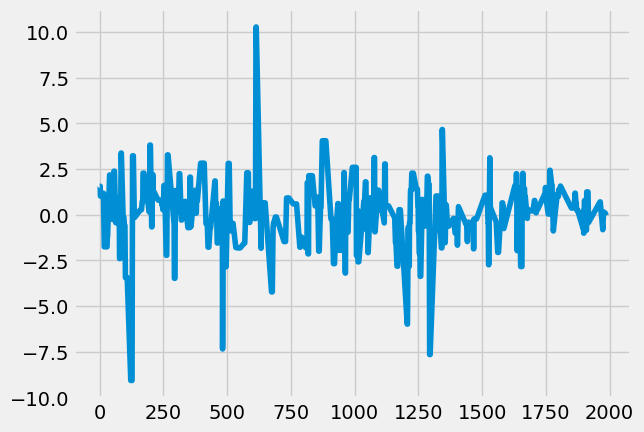

In [72]:
 
twt_merge22_clean[twt_merge22_clean['name']=='@JohnLegere']['adjClose_diff'].plot() #JohnLegere 변동폭 시각화 test

In [73]:
cor =twt_merge22_clean.iloc[:,8:9]
cor

,Volume
0,4200600.0
1,4200600.0
2,4200600.0
3,4207200.0
4,4207200.0
...,...
2106,40444700.0
2107,40444700.0
2108,68741000.0
2109,53631300.0


In [74]:
corr = twt_merge22_clean.iloc[:, 13:]
corr

,word,topic,Subjectivity,Polarity,Analysis,adjClose_diff_nextday
0,"[absolutely, ice, cold, water]",social,0.950000,-0.425000,0,1.566887
1,"[spell, check, text, game, changer]",business,0.400000,-0.500000,0,1.566887
2,"[i, wish, i, flight, today, https, //buzzfeed....",business,0.000000,0.000000,1,1.021454
3,"[absolutely, not]",social,0.900000,-0.125000,0,1.021454
4,"[baseball, coming, back, https, //espn.com/mlb...",business,0.000000,0.000000,1,1.021454
...,...,...,...,...,...,...
2106,"[martin, scorsese, killers, flower, moon, powe...",company,0.822222,0.505556,2,0.329575
2107,"[dr., king, wrote, involvement, humanity, conc...",social,0.100000,0.000000,1,2.926254
2108,"[apple, vision, pro, pre-orders, begin, today,...",business,0.541667,0.343750,2,-0.679138
2109,"[mac, changed, introduced, 40, years, ago, yea...",business,0.533333,0.666667,2,-1.747772


In [75]:
 
corrtopic = corr['topic']
corrtopic

0         social
1       business
2       business
3         social
4       business
          ...   
2106     company
2107      social
2108    business
2109    business
2110    business
Name: topic, Length: 2111, dtype: object

 

 ['business', 'company', 'emotion', 'social', 'technology', 'general', 'product', 'politics', 'environment', 'innovation']

In [108]:
def topic_numeric(x):
    if x == 'business':
        x = 0
    elif x == 'company': x = 1
    elif x == 'emotion': x = 2
    elif x == 'social': x = 3
    elif x == 'technology': x = 4
    elif x == 'general': x = 5
    elif x == 'product': x = 6
    elif x == 'politics': x = 7
    elif x == 'environment': x = 8
    elif x == 'innovation': x = 9
    else : x = -1
    return x


In [109]:
# corr['adjClose_diff_nextday_binary'] = corr['adjClose_diff_nextday'].apply(lambda x: 0 if x < 0 else 1)
corr['topic'] = corrtopic.apply(lambda x: topic_numeric(x))

In [110]:
corrr = pd.concat([cor, corr], axis=1) 

In [111]:
corrr

,Volume,word,topic,Subjectivity,Polarity,Analysis,adjClose_diff_nextday
0,4200600.0,"[absolutely, ice, cold, water]",3,0.950000,-0.425000,0,1.566887
1,4200600.0,"[spell, check, text, game, changer]",0,0.400000,-0.500000,0,1.566887
2,4200600.0,"[i, wish, i, flight, today, https, //buzzfeed....",0,0.000000,0.000000,1,1.021454
3,4207200.0,"[absolutely, not]",3,0.900000,-0.125000,0,1.021454
4,4207200.0,"[baseball, coming, back, https, //espn.com/mlb...",0,0.000000,0.000000,1,1.021454
...,...,...,...,...,...,...,...
2106,40444700.0,"[martin, scorsese, killers, flower, moon, powe...",1,0.822222,0.505556,2,0.329575
2107,40444700.0,"[dr., king, wrote, involvement, humanity, conc...",3,0.100000,0.000000,1,2.926254
2108,68741000.0,"[apple, vision, pro, pre-orders, begin, today,...",0,0.541667,0.343750,2,-0.679138
2109,53631300.0,"[mac, changed, introduced, 40, years, ago, yea...",0,0.533333,0.666667,2,-1.747772


In [112]:
corrr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Volume                 2111 non-null   float64
 1   word                   2111 non-null   object 
 2   topic                  2111 non-null   int64  
 3   Subjectivity           2111 non-null   float64
 4   Polarity               2111 non-null   float64
 5   Analysis               2111 non-null   int64  
 6   adjClose_diff_nextday  2101 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 115.6+ KB


In [113]:
corrr.isnull()

,Volume,word,topic,Subjectivity,Polarity,Analysis,adjClose_diff_nextday
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
2106,False,False,False,False,False,False,False
2107,False,False,False,False,False,False,False
2108,False,False,False,False,False,False,False
2109,False,False,False,False,False,False,False


In [114]:
corrrs = corrr[corrr['adjClose_diff_nextday'].notna()]

In [115]:
corrrs = corrrs.drop(columns='word')
corrrs

,Volume,topic,Subjectivity,Polarity,Analysis,adjClose_diff_nextday
0,4200600.0,3,0.950000,-0.425000,0,1.566887
1,4200600.0,0,0.400000,-0.500000,0,1.566887
2,4200600.0,0,0.000000,0.000000,1,1.021454
3,4207200.0,3,0.900000,-0.125000,0,1.021454
4,4207200.0,0,0.000000,0.000000,1,1.021454
...,...,...,...,...,...,...
2105,59144500.0,3,0.400000,0.400000,2,0.329575
2106,40444700.0,1,0.822222,0.505556,2,0.329575
2107,40444700.0,3,0.100000,0.000000,1,2.926254
2108,68741000.0,0,0.541667,0.343750,2,-0.679138


In [116]:
corrrs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2101 entries, 0 to 2109
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Volume                 2101 non-null   float64
 1   topic                  2101 non-null   int64  
 2   Subjectivity           2101 non-null   float64
 3   Polarity               2101 non-null   float64
 4   Analysis               2101 non-null   int64  
 5   adjClose_diff_nextday  2101 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 114.9 KB


In [117]:
corrrs['topic'].value_counts()

topic
 0    994
 3    554
 6    190
 1    172
 2     74
-1     31
 8     30
 7     30
 5     12
 4      8
 9      6
Name: count, dtype: int64

In [118]:
corrrs['topic'] = corrrs['topic'].astype(float)

In [119]:
corr = corrrs.corr()

In [120]:
corr.style.background_gradient(cmap='coolwarm')

,Volume,topic,Subjectivity,Polarity,Analysis,adjClose_diff_nextday
Volume,1.000000,0.094771,-0.152673,-0.057161,-0.098049,-0.076481
topic,0.094771,1.000000,-0.006084,-0.015384,-0.034037,0.010461
Subjectivity,-0.152673,-0.006084,1.000000,0.428345,0.349167,0.045570
Polarity,-0.057161,-0.015384,0.428345,1.000000,0.737062,0.027253
Analysis,-0.098049,-0.034037,0.349167,0.737062,1.000000,0.040603
adjClose_diff_nextday,-0.076481,0.010461,0.045570,0.027253,0.040603,1.000000


In [121]:
from keras.layers import Embedding, LSTM, Dense, Input
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler

In [122]:
# 텍스트 전처리
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')  # 토크나이저 초기화
tokenizer.fit_on_texts(twt_merge22_clean['content'])  # 트윗 내용을 기반으로 토크나이저 훈련

X = tokenizer.texts_to_sequences(twt_merge22_clean['content'])  # 각 트윗 내용을 시퀀스로 변환
X = pad_sequences(X, maxlen=100, padding='post', truncating='post')  # 시퀀스를 패딩하여 일정한 길이로 맞춤

In [123]:
# 다른 특성
X_other = twt_merge22_clean[['Subjectivity', 'Analysis']].values

# 입력 데이터 통합
scaler = StandardScaler()
X_other = scaler.fit_transform(X_other)  # 다른 특성들에 대해 스케일링 수행

X_combined = np.concatenate((X, X_other), axis=1)  # 텍스트 데이터와 다른 특성들을 결합하여 입력 데이터 생성

# 결측치 처리
X_filled = np.nan_to_num(X_combined, nan=np.nanmean(X_combined))

# 데이터 스케일링과 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filled)

# # 이상치 처리
# Q1 = np.percentile(X_scaled, 25, axis=0)
# Q3 = np.percentile(X_scaled, 75, axis=0)
# IQR = Q3 - Q1
# X_no_outliers = X_scaled[~((X_scaled < (Q1 - 1.5 * IQR)) | (X_scaled > (Q3 + 1.5 * IQR))).any(axis=1)]


In [124]:
X_scaled.shape

(2111, 102)

In [125]:
X_other[1]

array([-0.04482884, -2.03606064])

In [126]:
print(len(X_other), len(X_no_outliers))

NameError: name 'X_no_outliers' is not defined

In [ ]:
X_no_outliers[1]

array([-0.50234326, -0.47461024, -0.52267179, -0.39441953, -0.51704657,
       -0.32153444, -0.51717953, -0.50471519, -0.48482944, -0.47023213,
       -0.47050577, -0.45195969, -0.43662371, -0.41873324, -0.42037411,
       -0.39757901, -0.38508166, -0.37571327, -0.36742161, -0.35880743,
       -0.35118504, -0.35289625, -0.32911944, -0.34101341, -0.31633969,
       -0.31627707, -0.29904413, -0.30432129, -0.29891486, -0.28354102,
       -0.26858761, -0.2463226 , -0.24139043, -0.23129302, -0.23360126,
       -0.22077512, -0.21161105, -0.20311738, -0.18645788, -0.19050006,
       -0.16451686, -0.16007319, -0.15528238, -0.13472661, -0.1293489 ,
       -0.10694418, -0.11055572, -0.09893132, -0.09199139, -0.08289196,
       -0.06928971, -0.07631496, -0.04226869, -0.05256044, -0.05663938,
       -0.05522136, -0.04106142, -0.04112484, -0.03082853, -0.03249843,
       -0.03014773, -0.02556466, -0.02213229, -0.0221729 , -0.02177002,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [ ]:
X_no_outliers.shape

(261, 102)

In [ ]:
twt_merge22_clean['adjClose_diff'].shape

(2111,)

In [ ]:
len(X_no_outliers)

261

In [ ]:
len(X_scaled)

2111

In [ ]:
print(X_scaled.shape, twt_merge22_clean['adjClose_diff'].shape)

(2111, 102) (2111,)


In [ ]:
len(twt_merge22_clean['adjClose_diff']) # 같아야하는데 261로 다른게 문제

2111

In [ ]:

# 훈련 데이터, 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, twt_merge22_clean['adjClose_diff'], test_size=0.2, random_state=42)

# LSTM 모델 구성
model = Sequential()
model.add(Embedding(5000, 100, input_length=100))  # 임베딩 레이어
model.add(LSTM(50, return_sequences=True))  # LSTM 레이어
model.add(LSTM(50))  # LSTM 레이어
model.add(Dense(1, activation='linear'))  # 출력 레이어

model.compile(loss='mean_squared_error', optimizer='adam')  # 모델 컴파일

In [ ]:
len(y_test)

423

In [ ]:
# 모델 훈련
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10


ValueError: in user code:

    File "c:\Users\mit16\AppData\Local\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\mit16\AppData\Local\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\mit16\AppData\Local\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\mit16\AppData\Local\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\mit16\AppData\Local\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\mit16\AppData\Local\anaconda3\Lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_7" is incompatible with the layer: expected shape=(None, 100), found shape=(None, 102)


In [ ]:
X

array([[ 6.20000000e+01,  4.50000000e+01,  6.30000000e+01, ...,
         0.00000000e+00,  1.85942205e+00, -1.80000000e+00],
       [ 1.87000000e+02,  1.88000000e+02,  1.89000000e+02, ...,
         0.00000000e+00,  1.70831326e-01, -1.80000000e+00],
       [ 7.00000000e+00,  1.93000000e+02,  7.00000000e+00, ...,
         0.00000000e+00, -1.05723466e+00, -4.00000000e-01],
       ...,
       [ 7.00000000e+00,  8.20000000e+01,  5.10000000e+01, ...,
         0.00000000e+00, -1.05723466e+00, -4.00000000e-01],
       [ 7.26000000e+02,  4.40000000e+01,  1.53000000e+02, ...,
         0.00000000e+00,  9.40772022e-02, -4.00000000e-01],
       [ 7.30000000e+02,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00, -1.05723466e+00, -4.00000000e-01]])

In [ ]:
df3['adjClose_diff']

7127     1.566887
7128     1.566887
7129     1.566887
7139     1.021454
7140     1.021454
          ...    
7432     3.381714
7445   -12.456665
7446   -12.456665
7447   -12.456665
7448   -12.456665
Name: adjClose_diff, Length: 98, dtype: float64

In [ ]:
X_other

array([[ 1.85942205, -1.8       ],
       [ 0.17083133, -1.8       ],
       [-1.05723466, -0.4       ],
       [ 1.70591381, -1.8       ],
       [-1.05723466, -0.4       ],
       [ 0.63135607,  1.        ],
       [ 0.80533208,  1.        ],
       [-1.05723466, -0.4       ],
       [-0.20441106,  1.        ],
       [-1.05723466, -0.4       ],
       [ 1.50123614,  1.        ],
       [ 0.47784782, -1.8       ],
       [ 1.70591381,  1.        ],
       [-0.90372641, -1.8       ],
       [-1.05723466, -0.4       ],
       [-1.05723466, -0.4       ],
       [-0.39934217, -1.8       ],
       [ 0.47784782,  1.        ],
       [-1.05723466, -0.4       ],
       [-0.44320167,  1.        ],
       [ 0.47784782,  1.        ],
       [-1.05723466, -0.4       ],
       [ 0.11113367,  1.        ],
       [ 1.09188081,  1.        ],
       [-1.05723466, -0.4       ],
       [-1.05723466, -0.4       ],
       [ 0.10942803,  1.        ],
       [ 0.51196077,  1.        ],
       [-1.05723466,

In [ ]:
# lstm 테스트 예시

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# 가상의 입력 데이터 생성
Xx = np.random.rand(100, 10, 5)  # (샘플 수, 타임 스텝, 특성 수)
yy = np.random.rand(100, 1)  # (샘플 수, 출력 수)
print('x :', Xx )
print('y :', yy)
# LSTM 모델 구성
model = Sequential()
model.add(LSTM(50, input_shape=(10, 5)))  # LSTM 레이어
model.add(Dense(1, activation='linear'))  # 출력 레이어

model.compile(loss='mean_squared_error', optimizer='adam')  # 모델 컴파일

# 모델 훈련
model.fit(Xx, yy, epochs=10, batch_size=32)

x : [[[0.23941009 0.38622084 0.20983768 0.06152452 0.71049783]
  [0.74019379 0.94685833 0.514992   0.21526375 0.52523919]
  [0.47547245 0.12596968 0.1988515  0.91776413 0.0416762 ]
  ...
  [0.05684532 0.67728485 0.49314321 0.05895173 0.03603395]
  [0.41784282 0.0860204  0.65064156 0.77557894 0.73587203]
  [0.41737194 0.695751   0.74780092 0.00551834 0.95109111]]

 [[0.68835965 0.8453015  0.5848779  0.30960828 0.16161256]
  [0.57467001 0.15222815 0.66742963 0.07919628 0.89436569]
  [0.99235405 0.52565857 0.27010294 0.84585956 0.40708867]
  ...
  [0.13606182 0.8509484  0.11661707 0.33434126 0.95423801]
  [0.65729027 0.84115225 0.58571059 0.78271067 0.60274216]
  [0.74489209 0.65215183 0.00709421 0.20584612 0.66439504]]

 [[0.68573806 0.99837071 0.41654138 0.5728661  0.77418504]
  [0.48754184 0.21688532 0.95790712 0.75123539 0.02895016]
  [0.14856009 0.52913572 0.92215052 0.71094581 0.78803174]
  ...
  [0.00769238 0.70524198 0.65938074 0.86350516 0.7862956 ]
  [0.80066426 0.64861284 0.158

In [ ]:
len(Xx)

100

In [ ]:
len(yy)

100

In [ ]:
Xx.ndim

3

In [ ]:
yy.ndim

2

In [ ]:
Xx.shape

(100, 10, 5)

In [ ]:
yy.shape

(100, 1)